# Digit Recognizer

https://www.kaggle.com/c/digit-recognizer

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint
import pandas as pd

# validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC


%matplotlib inline

In [2]:
df_test = pd.read_csv("data/digits_test.csv")
df_train = pd.read_csv("data/digits_train.csv")
digits_test = df_test.values
digits_train = df_train.values

In [3]:
D = 28

def show_img(pixels):
    """Show image"""
    
    #img_2d_ar = np.reshape(np.array(img_ar), (D, D))
    img_2d_ar = np.reshape(pixels, (D, D))
    plt.gray()
    plt.matshow(img_2d_ar)
    plt.show()
    
    
def save_img(pixels):    
    """Save image with Pillow"""
    
    #img_ar = list(map(int, "0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,100,213,254,245,255,149,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,181,233,102,40,29,102,166,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,236,181,35,0,0,0,0,12,207,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,228,187,0,0,0,0,0,0,96,225,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,167,230,18,0,0,0,0,0,74,242,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,247,60,0,0,0,0,0,67,232,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,211,0,0,0,0,16,127,225,165,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,217,0,15,58,140,189,181,227,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,246,225,235,253,182,61,231,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,143,119,58,1,153,212,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,254,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,244,157,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,212,211,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,237,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,243,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,213,213,5,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,244,35,0,0,0,0,0,0,139,208,97,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,248,90,0,0,0,0,0,0,0,16,136,172,168,0,0,0,0,0,0,0,0,0,0,0,0,0,5,195,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,237,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0".split(",")))
    img = Image.new('L', (D, D))
    img.putdata(pixels)
    img.save('test_img.png')

In [4]:
X = [i[1:] for i in digits_train]
y = [i[0] for i in digits_train]

In [57]:
# probability=True to use method predict_proba
svc = SVC(kernel="poly", degree=2, probability=True)
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

7


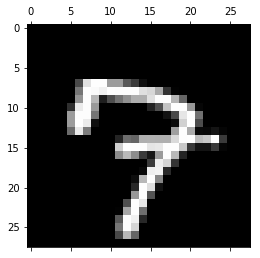

In [29]:
# check model
print(*svc.predict([digits_test[121]]))
show_img(digits_test[5])

In [31]:
# save result
output = svc.predict(digits_test).astype(int)

In [32]:
df_output = pd.DataFrame()
df_output["ImageId"] = list(range(1, len(digits_test) + 1))
df_output["Label"] = output
df_output.to_csv("data/output.csv",index=False)

In [91]:
# test with my custom imgs
test_img = Image.open('test_digit_8.png').convert('L')
#import PIL.ImageOps 
#img11 = PIL.ImageOps.invert(img11)
test_img = test_img.resize((28, 28))
#test_img.save('test_img.png')

test_img_ar = list(test_img.getdata())
svc.predict([test_img_ar])

array([3])

In [92]:
#!! in some cases algorithm is choosing wrong result but max probability is correct, lile with 
pp = svc.predict_proba([test_img_ar])[0]
print(pp)
print(*np.where(pp==max(pp))[0])

[ 0.01788595  0.04479232  0.12878502  0.14206524  0.06573865  0.1933775
  0.02584292  0.02661402  0.32531601  0.02958238]
8
